In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

# Visualization 

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


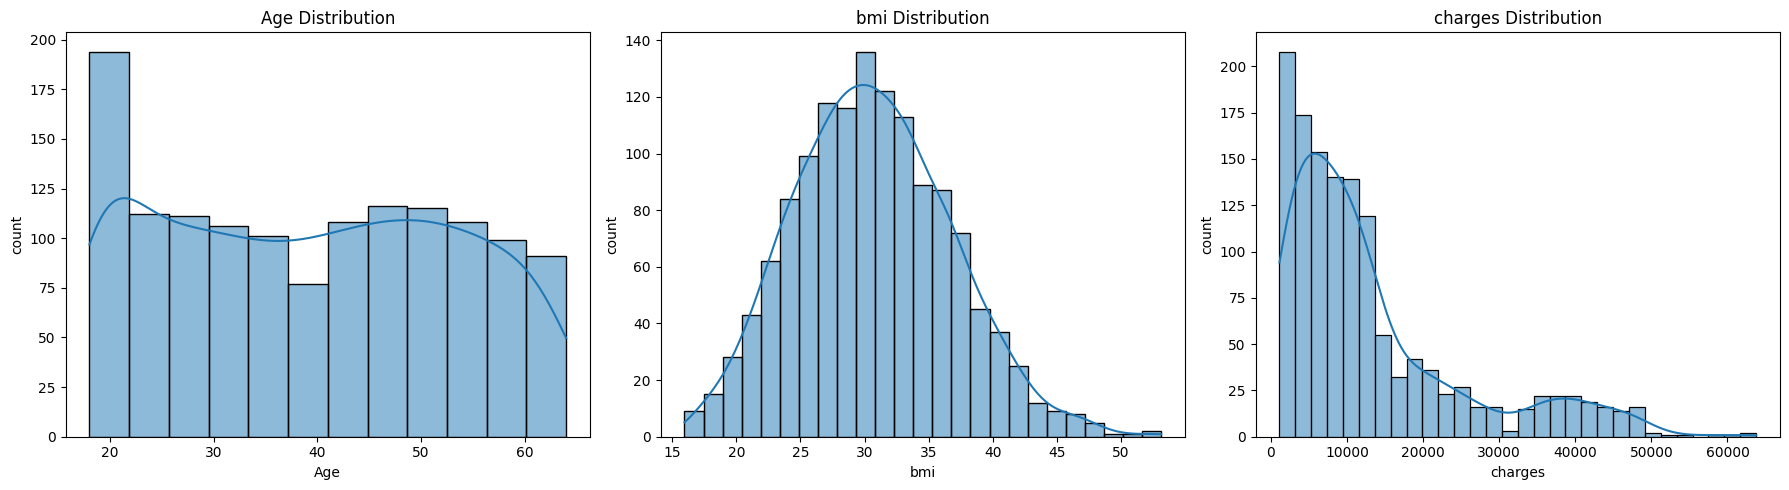

In [10]:
plt.figure(figsize=(18, 5)) 
plt.subplot(1,3,1)

sns.histplot(df['age'] , kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel('count')


plt.subplot(1,3,2)

sns.histplot(df['bmi'] , kde = True)
plt.title("bmi Distribution")
plt.xlabel("bmi")
plt.ylabel('count')

plt.subplot(1,3,3)

sns.histplot(df['charges'] , kde = True)
plt.title("charges Distribution")
plt.xlabel("charges")
plt.ylabel('count')


plt.tight_layout()
plt.show()

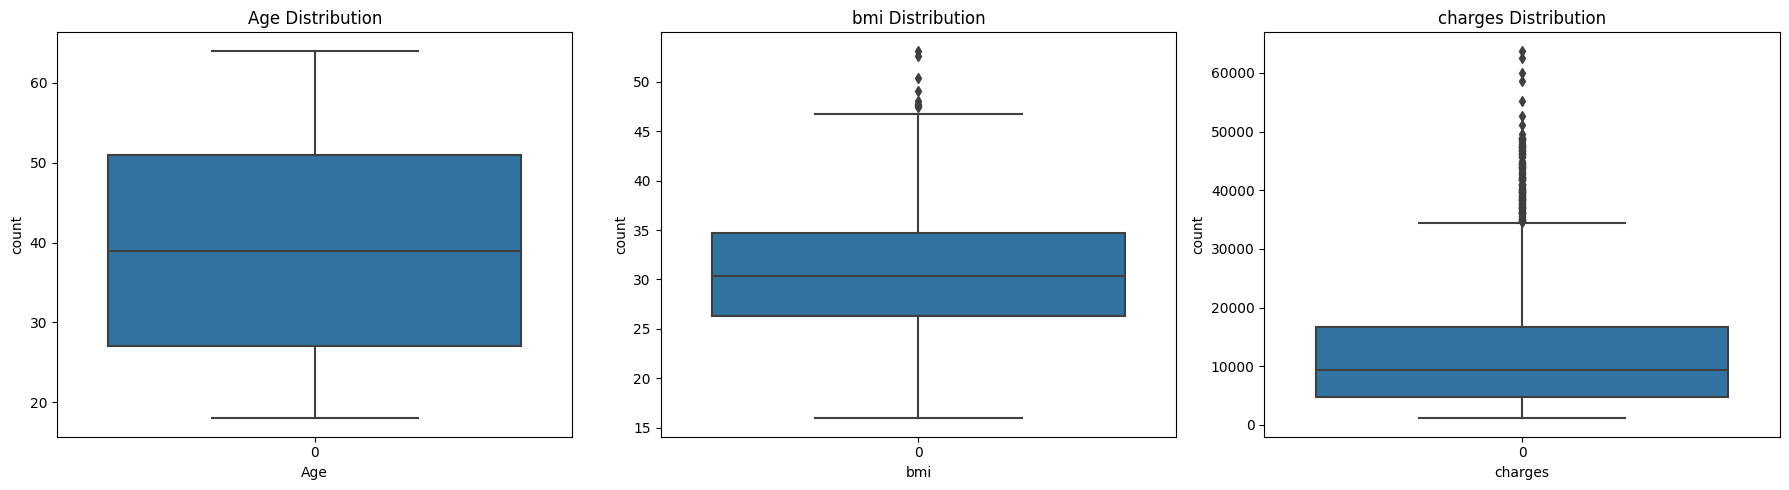

In [11]:
plt.figure(figsize=(18, 5)) 
plt.subplot(1,3,1)

sns.boxplot(df['age'] )
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel('count')


plt.subplot(1,3,2)

sns.boxplot(df['bmi'] )
plt.title("bmi Distribution")
plt.xlabel("bmi")
plt.ylabel('count')

plt.subplot(1,3,3)

sns.boxplot(df['charges'] )
plt.title("charges Distribution")
plt.xlabel("charges")
plt.ylabel('count')


plt.tight_layout()
plt.show()

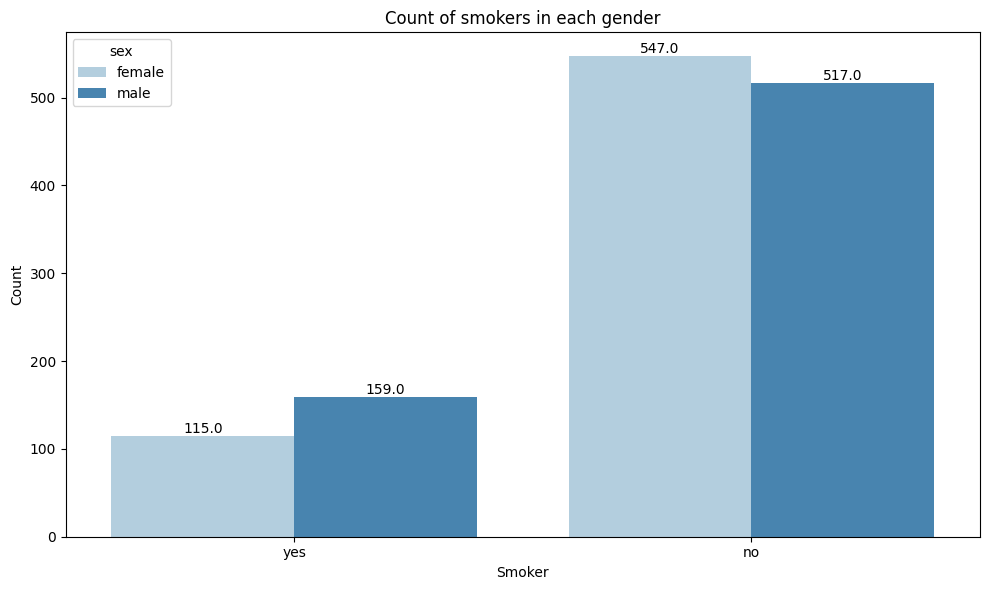

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(df, x='smoker', hue='sex',palette='Blues')
plt.title("Count of smokers in each gender")
plt.xlabel("Smoker")
plt.ylabel("Count")

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

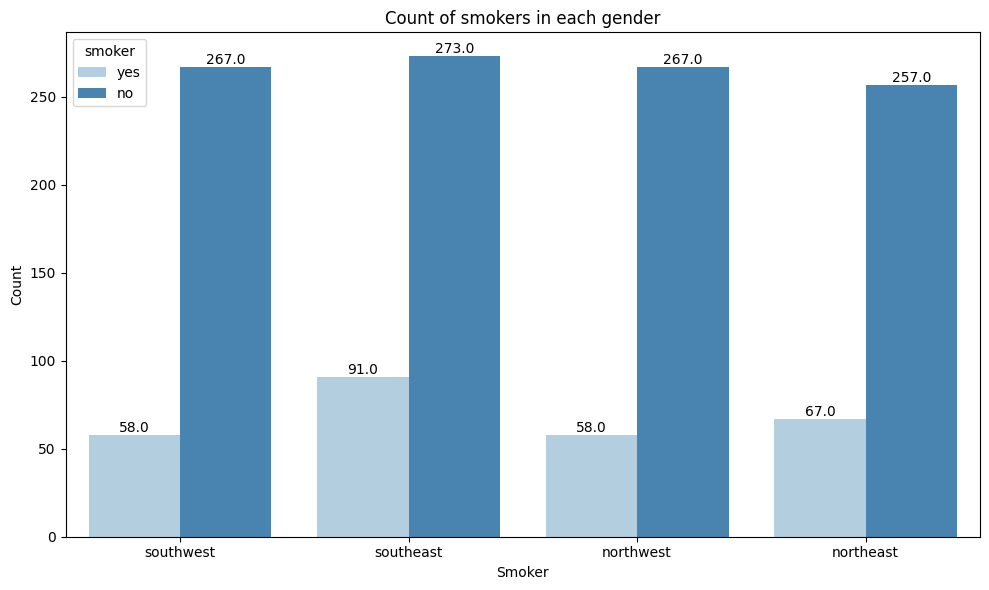

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(df, x='region', hue='smoker',palette='Blues')
plt.title("Count of smokers in each gender")
plt.xlabel("Smoker")
plt.ylabel("Count")

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:

df['sex'] = df['sex'].map({'female': 0, 'male': 1})


df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


df = pd.get_dummies(df, columns=['region'], drop_first=True, dtype=int)


In [30]:
X = df.drop('charges', axis=1)
y = df['charges']

X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [24]:
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics  import r2_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [36]:


scale = RobustScaler()

columns_to_scale = [
    "age", "sex", "bmi", "children", "smoker",
    "region_northwest", "region_southeast", "region_southwest"
]


X_train[columns_to_scale] = scale.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scale.transform(X_test[columns_to_scale])


In [51]:
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

models = {
    "DecisionTree": {
        'model': DecisionTreeRegressor(random_state=43),
        "params": {
            "criterion": ['squared_error', 'friedman_mse', 'absolute_error'],
            "max_depth": [2, 4,5, 6,7, 8,9, 10],
            "min_samples_split": [random.randint(2, 10) for _ in range(3)]
        }
    },
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
            "n_jobs": [-1]
        }
    }
}

for name, mp in models.items():
    print(f"Training {name}....")
    
    cvs = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
    cvs.fit(X_train, y_train)

    print(f"Best params for {name}: {cvs.best_params_}")
    
    y_pred = cvs.predict(X_test)
    r2_scores = r2_score(y_test, y_pred)
    print(f"R2 score for {name}: {r2_scores:.4f}\n")


Training DecisionTree....
Best params for DecisionTree: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 4}
R2 score for DecisionTree: 0.8628

Training LinearRegression....
Best params for LinearRegression: {'fit_intercept': True, 'n_jobs': -1}
R2 score for LinearRegression: 0.7696

